<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/Final_Big_Data_Project%20-%20Group%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prep: Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/BIGDATAANALYTICS/DATAV2.csv')


## **Step 1. Data Exploration**

In [4]:
print(data)

                   Provider      Month  Year   Charges  Payer Charges  \
0    FLETCHER, JAMILA FORTE    January  2021  63503.84       63037.84   
1    FLETCHER, JAMILA FORTE   February  2021  39850.40       39850.40   
2    FLETCHER, JAMILA FORTE      March  2021  74180.11       73626.11   
3    FLETCHER, JAMILA FORTE      April  2021  77699.97       76763.50   
4    FLETCHER, JAMILA FORTE        May  2021  76033.75       75630.30   
..                      ...        ...   ...       ...            ...   
293          OWREY, SARAH E       June  2023  82788.15       81144.15   
294          OWREY, SARAH E       July  2023  79919.15       79919.15   
295          OWREY, SARAH E     August  2023  75520.10       74771.65   
296          OWREY, SARAH E  September  2023  61241.10       59340.65   
297          SENA, THOMAS J        May  2023     35.00          35.00   

     Self Charges  Payments  Payer Payments  Patient Payments  \
0          466.00  54275.72        50256.01           4019

In [5]:
#Removing Ben Meares since he is the designated flu doctor


data = data[data['Provider'] != 'MEARES, BEN M']

# Verify the changes
print(data['Provider'].value_counts())

FLETCHER, JAMILA FORTE    33
GESSNER, RICHARD R        33
HARRIS, JAMES T           33
Harris, Lillian R         33
LONG, JENNIFER R          33
Mims, Emily L             33
OWREY, SARAH E            33
SENA, THOMAS J            25
Goley, Michael             9
Name: Provider, dtype: int64


In [6]:
# Create a mapping of provider names to anonymous labels
provider_mapping = {
    'FLETCHER, JAMILA FORTE': 'Provider 1',
    'GESSNER, RICHARD R': 'Provider 2',
    'HARRIS, JAMES T': 'Provider 3',
    'Harris, Lillian R': 'Provider 4',
    'LONG, JENNIFER R': 'Provider 5',
    'Mims, Emily L': 'Provider 6',
    'OWREY, SARAH E': 'Provider 7',
    'SENA, THOMAS J': 'Provider 8',
    'Goley, Michael': 'Provider 9',
    'Overall': 'Provider 10'
}


In [7]:
print(provider_mapping)

{'FLETCHER, JAMILA FORTE': 'Provider 1', 'GESSNER, RICHARD R': 'Provider 2', 'HARRIS, JAMES T': 'Provider 3', 'Harris, Lillian R': 'Provider 4', 'LONG, JENNIFER R': 'Provider 5', 'Mims, Emily L': 'Provider 6', 'OWREY, SARAH E': 'Provider 7', 'SENA, THOMAS J': 'Provider 8', 'Goley, Michael': 'Provider 9', 'Overall': 'Provider 10'}


In [8]:
data['Provider'] = data['Provider'].map(provider_mapping)


In [9]:
print(data['Provider'].value_counts())

Provider 1    33
Provider 2    33
Provider 3    33
Provider 4    33
Provider 5    33
Provider 6    33
Provider 7    33
Provider 8    25
Name: Provider, dtype: int64


In [10]:
print(data)

       Provider      Month  Year   Charges  Payer Charges  Self Charges  \
0    Provider 1    January  2021  63503.84       63037.84        466.00   
1    Provider 1   February  2021  39850.40       39850.40          0.00   
2    Provider 1      March  2021  74180.11       73626.11        554.00   
3    Provider 1      April  2021  77699.97       76763.50        936.47   
4    Provider 1        May  2021  76033.75       75630.30        403.45   
..          ...        ...   ...       ...            ...           ...   
293  Provider 7       June  2023  82788.15       81144.15       1644.00   
294  Provider 7       July  2023  79919.15       79919.15          0.00   
295  Provider 7     August  2023  75520.10       74771.65        748.45   
296  Provider 7  September  2023  61241.10       59340.65       1900.45   
297  Provider 8        May  2023     35.00          35.00          0.00   

     Payments  Payer Payments  Patient Payments  Contractual Adjustments  \
0    54275.72        50

In [11]:
data.tail()

,Provider,Month,Year,Charges,Payer Charges,Self Charges,Payments,Payer Payments,Patient Payments,Contractual Adjustments,Payer Withheld,Writeoff Adjustments,Refunds,Claim Count,Patient Count,Balance,Collection %,Provider Type,Monthly Salary (Pre Tax),Days Worked (Mthly)
293,Provider 7,June,2023,82788.15,81144.15,1644.00,65101.30,58505.19,6596.11,14720.00,0,100.00,0.0,282,272,2866.85,0.965371,MD,8333.333333,12
294,Provider 7,July,2023,79919.15,79919.15,0.00,66012.85,60579.91,5432.94,11691.20,0,30.00,0.0,245,234,2185.10,0.972659,MD,8333.333333,12
295,Provider 7,August,2023,75520.10,74771.65,748.45,53673.93,50296.21,3377.72,12162.86,0,217.25,0.0,244,237,9466.06,0.874655,MD,8333.333333,12
296,Provider 7,September,2023,61241.10,59340.65,1900.45,7254.15,5717.10,1537.05,1090.82,0,214.50,0.0,175,167,52681.63,0.139767,MD,8333.333333,12
297,Provider 8,May,2023,35.00,35.00,0.00,35.00,0.00,35.00,0.00,0,0.00,0.0,2,2,0.00,1.000000,Partner,25000.000000,16


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 297
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Provider                  256 non-null    object 
 1   Month                     265 non-null    object 
 2   Year                      265 non-null    int64  
 3   Charges                   265 non-null    float64
 4   Payer Charges             265 non-null    float64
 5   Self Charges              265 non-null    float64
 6   Payments                  265 non-null    float64
 7   Payer Payments            265 non-null    float64
 8   Patient Payments          265 non-null    float64
 9   Contractual Adjustments   265 non-null    float64
 10  Payer Withheld            265 non-null    int64  
 11  Writeoff Adjustments      265 non-null    float64
 12  Refunds                   265 non-null    float64
 13  Claim Count               265 non-null    int64  
 14  Patient Co

In [13]:
data.isna().sum()

Provider                    9
Month                       0
Year                        0
Charges                     0
Payer Charges               0
Self Charges                0
Payments                    0
Payer Payments              0
Patient Payments            0
Contractual Adjustments     0
Payer Withheld              0
Writeoff Adjustments        0
Refunds                     0
Claim Count                 0
Patient Count               0
Balance                     0
Collection %                0
Provider Type               0
Monthly Salary (Pre Tax)    0
Days Worked (Mthly)         0
dtype: int64

In [14]:
len(data)

265

In [15]:
data = data.dropna(subset=['Month', 'Year', 'Provider'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 297
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Provider                  256 non-null    object 
 1   Month                     256 non-null    object 
 2   Year                      256 non-null    int64  
 3   Charges                   256 non-null    float64
 4   Payer Charges             256 non-null    float64
 5   Self Charges              256 non-null    float64
 6   Payments                  256 non-null    float64
 7   Payer Payments            256 non-null    float64
 8   Patient Payments          256 non-null    float64
 9   Contractual Adjustments   256 non-null    float64
 10  Payer Withheld            256 non-null    int64  
 11  Writeoff Adjustments      256 non-null    float64
 12  Refunds                   256 non-null    float64
 13  Claim Count               256 non-null    int64  
 14  Patient Co

DATA DICTIONARY

 0   Provider: Name of Provider (Names replaced with anonymous values)              
 1   Month: Month of Charge               
 2   Year: Yr of Charge                     
 3   Charges: Total Charges given to patient from provider (Payments + Contract Adj - Refunds)                  
 4   Payer Charges = Charges to the Insurance Co.            
 5   Self Charges = Charges to Non-Insurance directly to patient         
 6   Payments: Total Payments made by patient and insurance co. (Payer + Patient Payments)                 
 7   Payer Payments = Payments made by Insurance Co.         
 8   Patient Payments = Payments made by non-Insurance directly from payment.        
 9   Contractual Adjustments = Portion of bill that insurance company is contractually agreed to pay (ex: $150 for outo f network vs. free in network)
 10  Payer Withheld = Witheld portion of physicians invoice by the payer (amount not to be paid by insurance)         
 11  Writeoff Adjustments: Reduction from Invoice for Contractual Adjustments  
 12  Refunds: Payments made back to patient              
 13  Claim Count: Total amount of claims             
 14  Patient Count: Total amount of patients            
 15  Balance: Amount of money owed to physician from patient                  
 16  Collection %: Total % of Charges that have been collected (Balance / Charges)   
17 Provider Type = Nurse Practioner, MD, or Partner

18 Monthly Salary (Pre Tax) = Monthly Pay of Providers

19 Days Worked (mthly) = # of Days worked by Month by Provider



In [17]:
print(data)

       Provider      Month  Year   Charges  Payer Charges  Self Charges  \
0    Provider 1    January  2021  63503.84       63037.84        466.00   
1    Provider 1   February  2021  39850.40       39850.40          0.00   
2    Provider 1      March  2021  74180.11       73626.11        554.00   
3    Provider 1      April  2021  77699.97       76763.50        936.47   
4    Provider 1        May  2021  76033.75       75630.30        403.45   
..          ...        ...   ...       ...            ...           ...   
293  Provider 7       June  2023  82788.15       81144.15       1644.00   
294  Provider 7       July  2023  79919.15       79919.15          0.00   
295  Provider 7     August  2023  75520.10       74771.65        748.45   
296  Provider 7  September  2023  61241.10       59340.65       1900.45   
297  Provider 8        May  2023     35.00          35.00          0.00   

     Payments  Payer Payments  Patient Payments  Contractual Adjustments  \
0    54275.72        50



>*SUMMARY STATISTICS*





In [18]:
summary_stats = data.describe()
print(summary_stats)

              Year        Charges  Payer Charges  Self Charges       Payments  \
count   256.000000     256.000000     256.000000    256.000000     256.000000   
mean   2021.875000   70474.557969   69975.655859    498.902109   56619.952266   
std       0.782154   22122.773050   21963.006330    470.443717   19432.656307   
min    2021.000000      10.000000      10.000000      0.000000      10.000000   
25%    2021.000000   54987.547500   54166.460000    153.960000   43743.020000   
50%    2022.000000   69323.635000   68951.740000    378.000000   55810.145000   
75%    2022.250000   85187.950000   84220.475000    722.950000   68126.352500   
max    2023.000000  126852.800000  126116.350000   2806.450000  104962.550000   

       Payer Payments  Patient Payments  Contractual Adjustments  \
count      256.000000        256.000000               256.000000   
mean     51802.998164       4816.954102             11618.374766   
std      18133.491996       1804.137389              4136.789424  



> *VISUALIZATION*



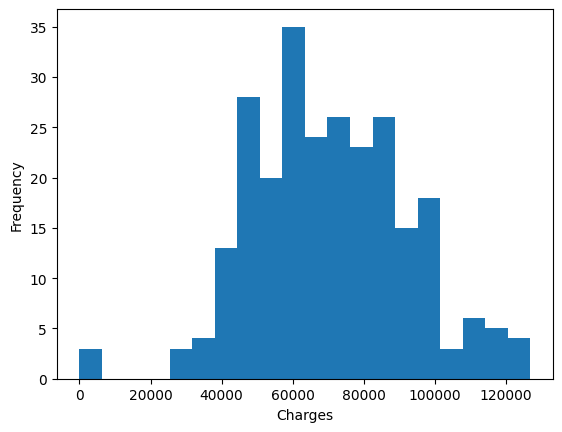

In [19]:
import matplotlib.pyplot as plt
data['Charges'].plot(kind='hist', bins=20)
plt.xlabel('Charges')
plt.show()

<Axes: >

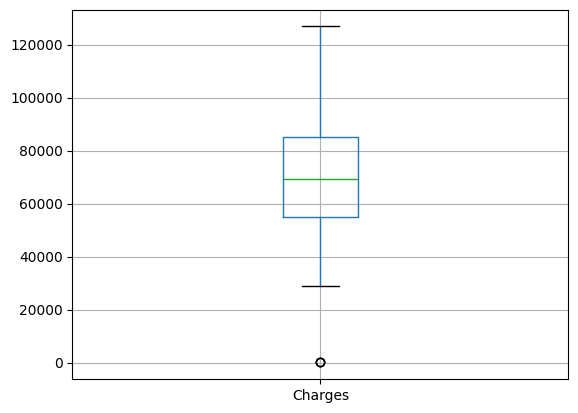

In [20]:
data.boxplot(column='Charges')

<Axes: xlabel='Payments', ylabel='Charges'>

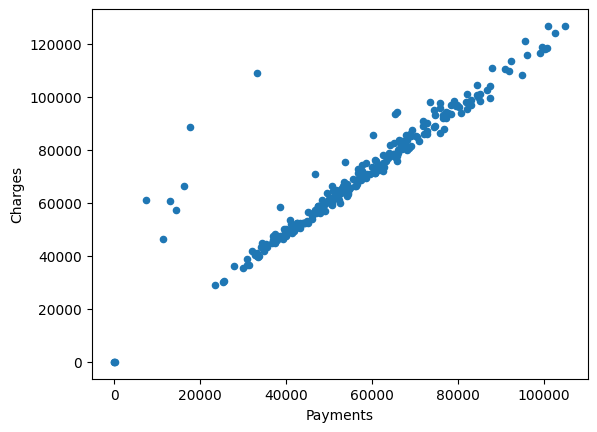

In [21]:
data.plot.scatter(x='Payments', y='Charges')



> *CORRELATION*



In [22]:
correlation_matrix = data.corr(numeric_only=True)

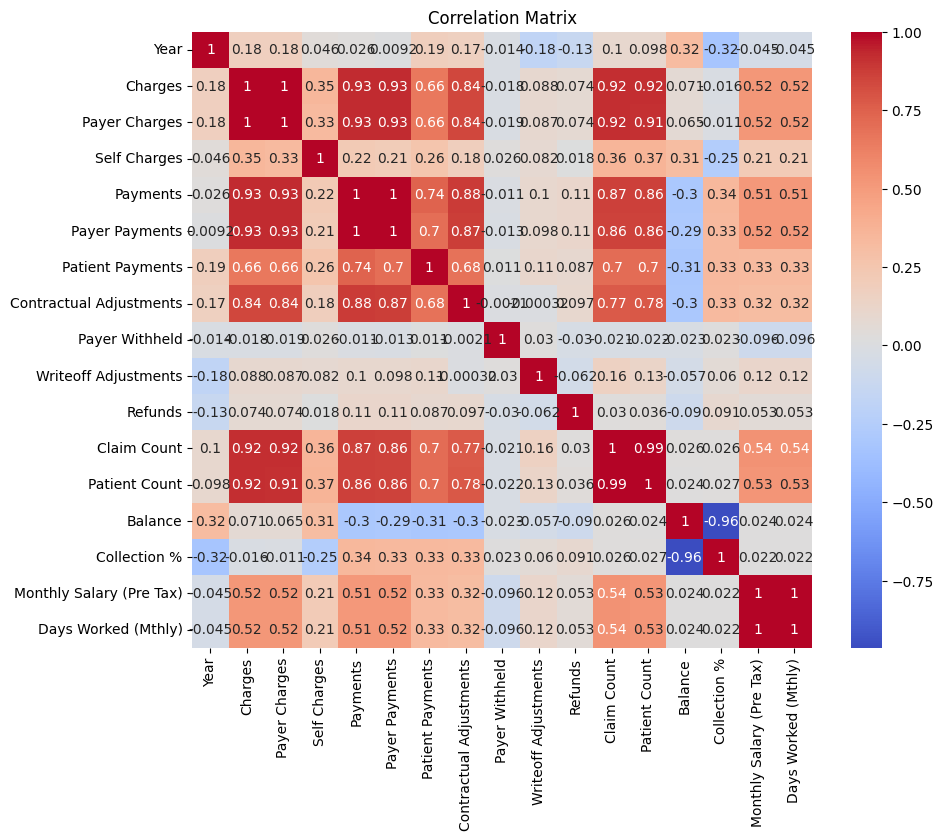

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()



> *CATEOGIRCAL ANALYSIS*



In [24]:
provider_counts = data['Provider'].value_counts()
print(provider_counts)

Provider 1    33
Provider 2    33
Provider 3    33
Provider 4    33
Provider 5    33
Provider 6    33
Provider 7    33
Provider 8    25
Name: Provider, dtype: int64




> *TIME SERIES*



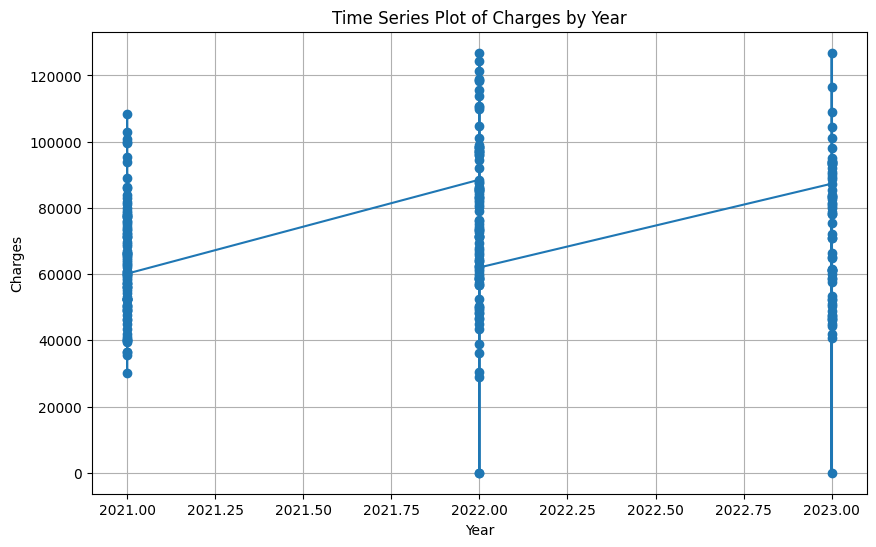

In [25]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(data['Year'], data['Charges'], marker='o')
plt.xlabel('Year')
plt.ylabel('Charges')
plt.title('Time Series Plot of Charges by Year')
plt.grid(True)
plt.show()


In [26]:
# Clean the 'Month' column by removing leading spaces
data['Month'] = data['Month'].str.strip()

# Convert 'Year' to integer and 'Month' to a string
data['Year'] = data['Year'].astype(int).astype(str)

# Create a new column 'Date' by combining 'Year' and 'Month'
data['Date'] = pd.to_datetime(data['Year'] + '-' + data['Month'], format='%Y-%B')

# Remove the day and format the 'Date' column as 'YYYY-MM'
data['Date'] = data['Date'].dt.strftime('%Y-%m')

# Display the DataFrame with the new 'Date' column
print(data)


       Provider      Month  Year   Charges  Payer Charges  Self Charges  \
0    Provider 1    January  2021  63503.84       63037.84        466.00   
1    Provider 1   February  2021  39850.40       39850.40          0.00   
2    Provider 1      March  2021  74180.11       73626.11        554.00   
3    Provider 1      April  2021  77699.97       76763.50        936.47   
4    Provider 1        May  2021  76033.75       75630.30        403.45   
..          ...        ...   ...       ...            ...           ...   
293  Provider 7       June  2023  82788.15       81144.15       1644.00   
294  Provider 7       July  2023  79919.15       79919.15          0.00   
295  Provider 7     August  2023  75520.10       74771.65        748.45   
296  Provider 7  September  2023  61241.10       59340.65       1900.45   
297  Provider 8        May  2023     35.00          35.00          0.00   

     Payments  Payer Payments  Patient Payments  Contractual Adjustments  ...  \
0    54275.72     

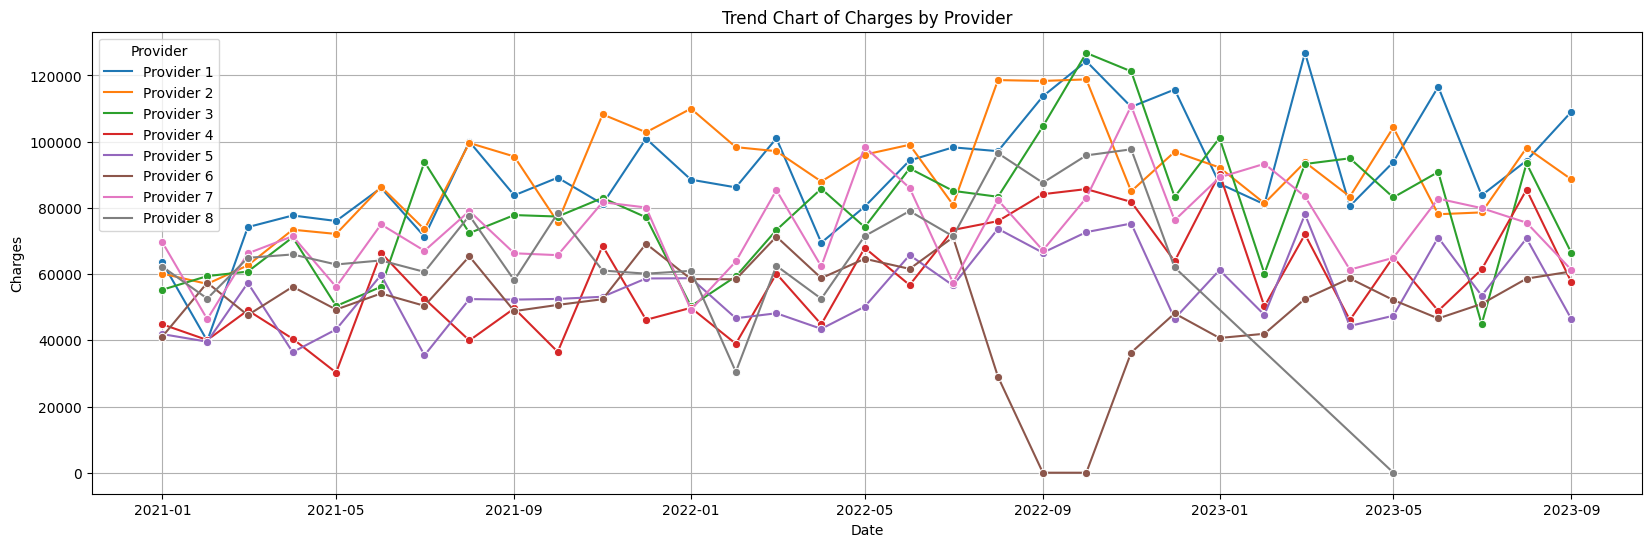

In [27]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Create a trend chart with 'Provider' on the Y-axis and 'Date' on the X-axis
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
sns.lineplot(data=data, x='Date', y='Charges', hue='Provider', marker='o')

plt.xlabel('Date')
plt.ylabel('Charges')
plt.title('Trend Chart of Charges by Provider')
plt.grid(True)
plt.legend(title='Provider')
plt.show()




In [28]:
print(data.describe())

             Charges  Payer Charges  Self Charges       Payments  \
count     256.000000     256.000000    256.000000     256.000000   
mean    70474.557969   69975.655859    498.902109   56619.952266   
std     22122.773050   21963.006330    470.443717   19432.656307   
min        10.000000      10.000000      0.000000      10.000000   
25%     54987.547500   54166.460000    153.960000   43743.020000   
50%     69323.635000   68951.740000    378.000000   55810.145000   
75%     85187.950000   84220.475000    722.950000   68126.352500   
max    126852.800000  126116.350000   2806.450000  104962.550000   

       Payer Payments  Patient Payments  Contractual Adjustments  \
count      256.000000        256.000000               256.000000   
mean     51802.998164       4816.954102             11618.374766   
std      18133.491996       1804.137389              4136.789424   
min          0.000000         10.000000                 0.000000   
25%      39561.395000       3908.462500        

In [29]:
data['Income to Charges'] = data['Monthly Salary (Pre Tax)'] / data['Charges']

In [30]:
print(data)

              Provider      Month  Year   Charges  Payer Charges  \
Date                                                               
2021-01-01  Provider 1    January  2021  63503.84       63037.84   
2021-02-01  Provider 1   February  2021  39850.40       39850.40   
2021-03-01  Provider 1      March  2021  74180.11       73626.11   
2021-04-01  Provider 1      April  2021  77699.97       76763.50   
2021-05-01  Provider 1        May  2021  76033.75       75630.30   
...                ...        ...   ...       ...            ...   
2023-06-01  Provider 7       June  2023  82788.15       81144.15   
2023-07-01  Provider 7       July  2023  79919.15       79919.15   
2023-08-01  Provider 7     August  2023  75520.10       74771.65   
2023-09-01  Provider 7  September  2023  61241.10       59340.65   
2023-05-01  Provider 8        May  2023     35.00          35.00   

            Self Charges  Payments  Payer Payments  Patient Payments  \
Date                                       



> *OUTLIERS*



<Axes: >

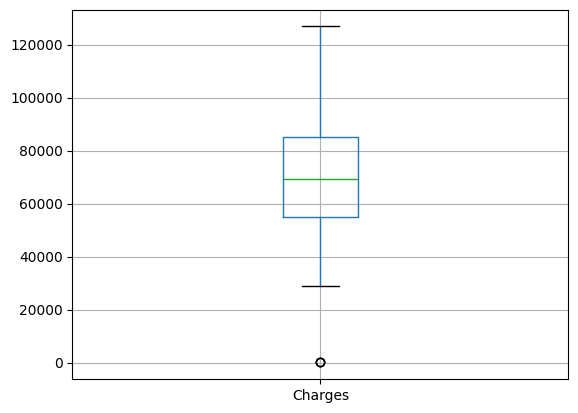

In [31]:
  data.boxplot(column='Charges')

<Axes: >

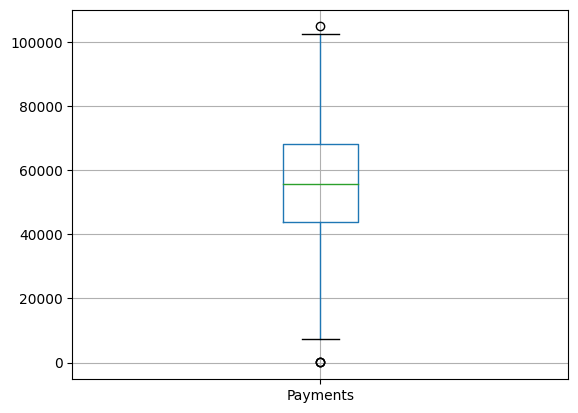

In [32]:
data.boxplot(column='Payments')

<Axes: >

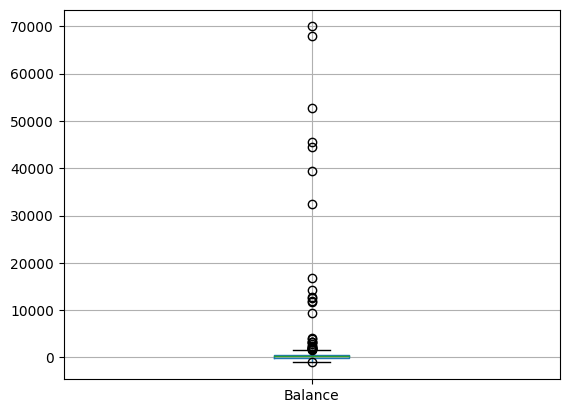

In [33]:
data.boxplot(column='Balance')

<Axes: >

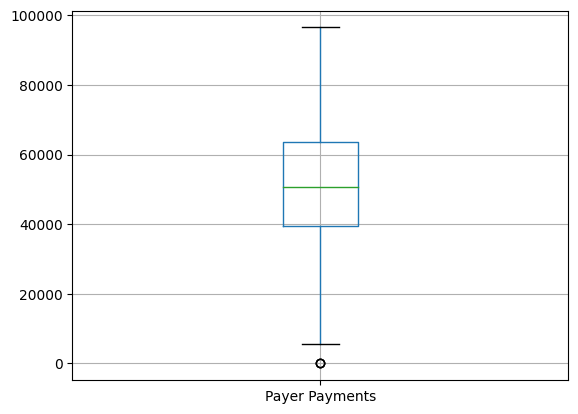

In [34]:
data.boxplot(column='Payer Payments')

<Axes: >

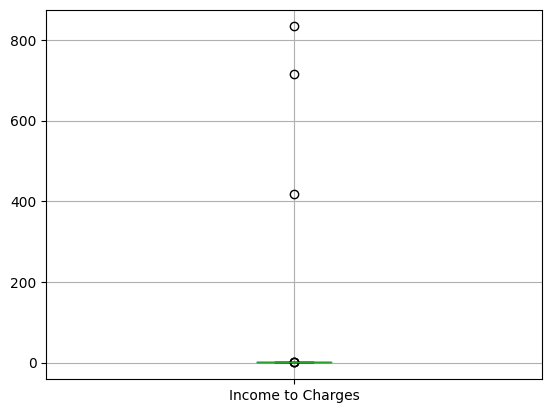

In [35]:
data.boxplot(column='Income to Charges')

## KPI's

Identify which Providers had the most patients, charges, payments, balances. Additionally look to see whihc provider had the most claims.

Goal is to maximize patient count and charges across all providers while keeping the collection percentage as close to 100% as possible.

After modelling will use additional CPT lvl data to identify which claims are the most commmon and see how that can be linked to patient demographics.



> *DESCRIPTIVE / CATEOGIRCAL / OUTLIER / TSA*



In [36]:
# Calculate summary statistics for Charges
charges_summary = data['Charges'].describe()
print(charges_summary)

# Calculate the mean and median of Payments
mean_payments = data['Payments'].mean()
median_payments = data['Payments'].median()
print(f"Mean Payments: {mean_payments}, Median Payments: {median_payments}")


count       256.000000
mean      70474.557969
std       22122.773050
min          10.000000
25%       54987.547500
50%       69323.635000
75%       85187.950000
max      126852.800000
Name: Charges, dtype: float64
Mean Payments: 56619.952265625005, Median Payments: 55810.145000000004


In [37]:
# Explore the distribution of Providers
provider_counts = data['Provider'].value_counts()
print(provider_counts)

# Calculate the percentage of charges by each provider
provider_percentage = (data.groupby('Provider')['Charges'].sum() / data['Charges'].sum()) * 100
print(provider_percentage)

Provider 1    33
Provider 2    33
Provider 3    33
Provider 4    33
Provider 5    33
Provider 6    33
Provider 7    33
Provider 8    25
Name: Provider, dtype: int64
Provider
Provider 1    16.607956
Provider 2    16.476465
Provider 3    14.421728
Provider 4    10.667939
Provider 5    10.017214
Provider 6     9.220114
Provider 7    13.516006
Provider 8     9.072578
Name: Charges, dtype: float64


In [38]:
# Investigate potential outliers in 'Charges'
Q1 = data['Charges'].quantile(0.25)
Q3 = data['Charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Charges'] < (Q1 - 1.5 * IQR)) | (data['Charges'] > (Q3 + 1.5 * IQR))]
print(outliers)


              Provider      Month  Year  Charges  Payer Charges  Self Charges  \
Date                                                                            
2022-09-01  Provider 6  September  2022     20.0           20.0           0.0   
2022-10-01  Provider 6    October  2022     10.0           10.0           0.0   
2023-05-01  Provider 8        May  2023     35.0           35.0           0.0   

            Payments  Payer Payments  Patient Payments  \
Date                                                     
2022-09-01      20.0             0.0              20.0   
2022-10-01      10.0             0.0              10.0   
2023-05-01      35.0             0.0              35.0   

            Contractual Adjustments  ...  Writeoff Adjustments  Refunds  \
Date                                 ...                                  
2022-09-01                      0.0  ...                   0.0      0.0   
2022-10-01                      0.0  ...                   0.0      0.0   
202

In [39]:
# Time series analysis for yearly charges

yearly_charges = data.groupby('Year')['Charges'].sum()
print(yearly_charges)

# Perform forecasting or anomaly detection for future trends
# Example: Using a simple moving average for trend analysis
window = 3
data['Yearly_Trend'] = data['Charges'].rolling(window=window).mean()
print(data[['Year', 'Yearly_Trend']])


Year
2021    6128512.35
2022    7260918.71
2023    4652055.78
Name: Charges, dtype: float64
            Year  Yearly_Trend
Date                          
2021-01-01  2021           NaN
2021-02-01  2021           NaN
2021-03-01  2021  59178.116667
2021-04-01  2021  63910.160000
2021-05-01  2021  75971.276667
...          ...           ...
2023-06-01  2023  69677.600000
2023-07-01  2023  75871.983333
2023-08-01  2023  79409.133333
2023-09-01  2023  72226.783333
2023-05-01  2023  45598.733333

[256 rows x 2 columns]


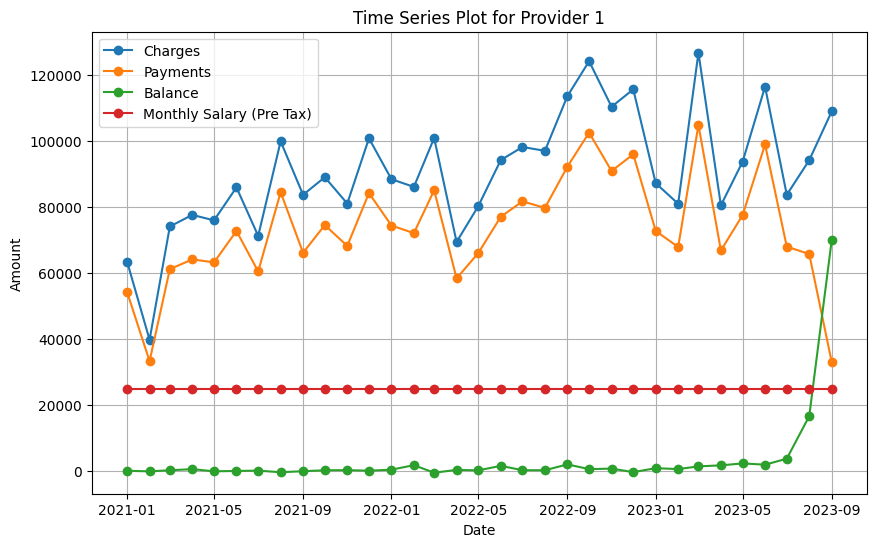

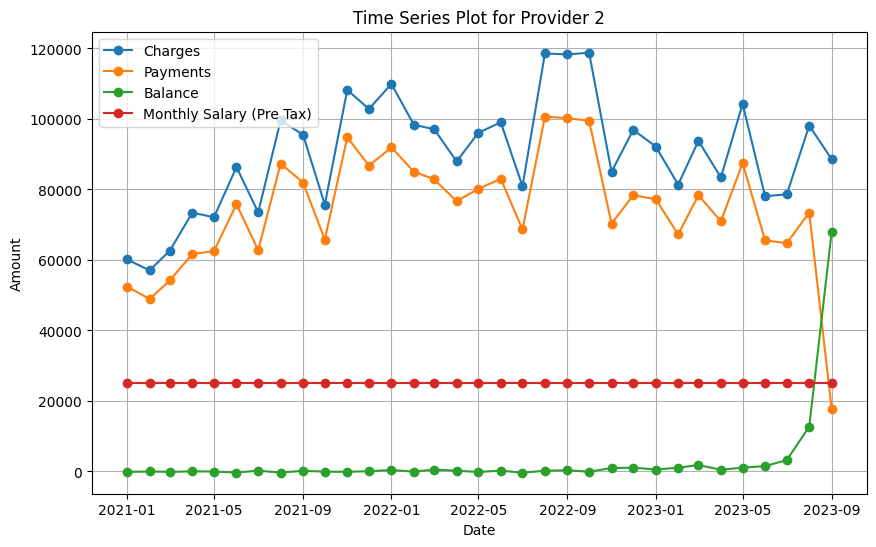

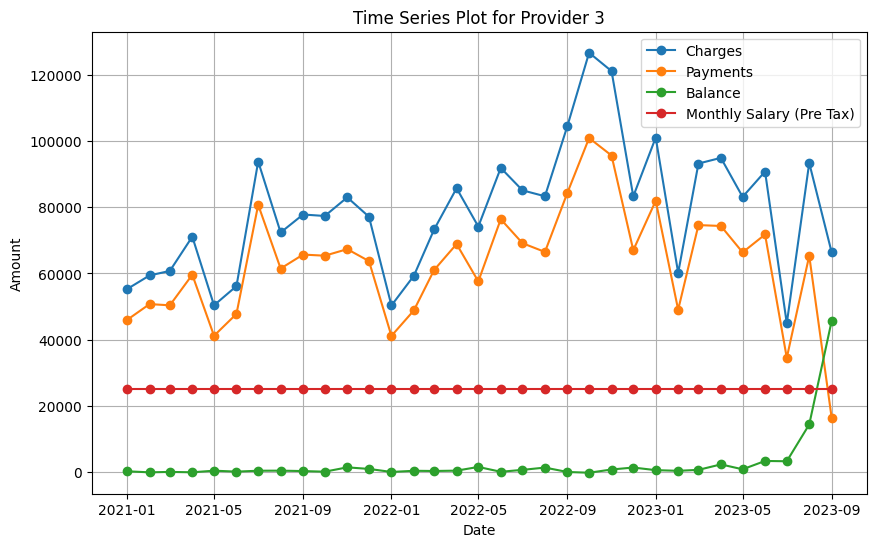

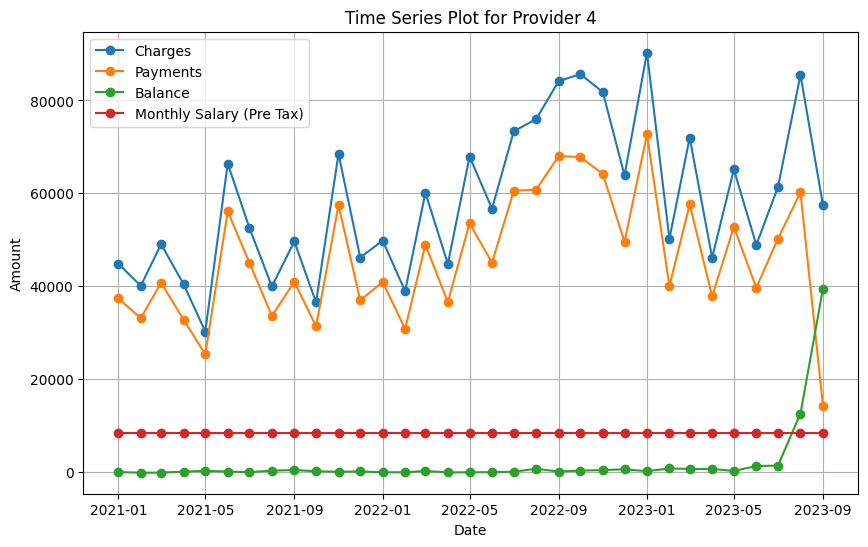

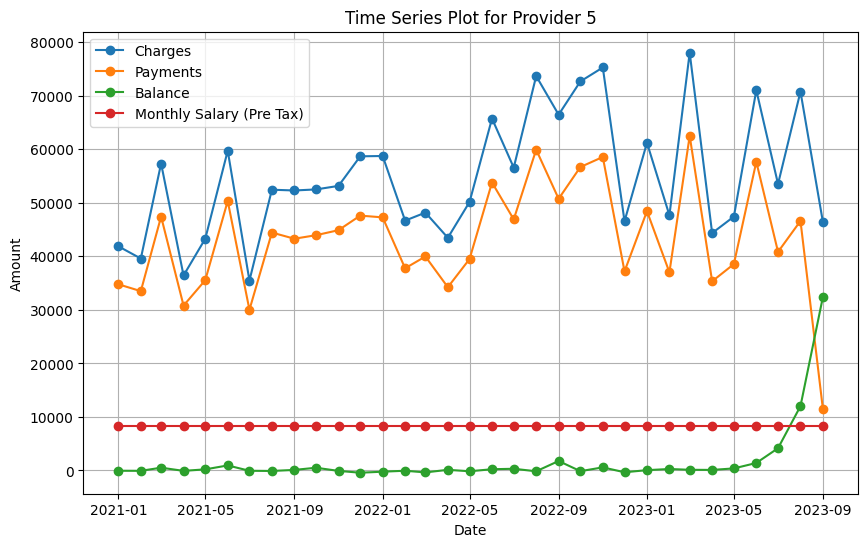

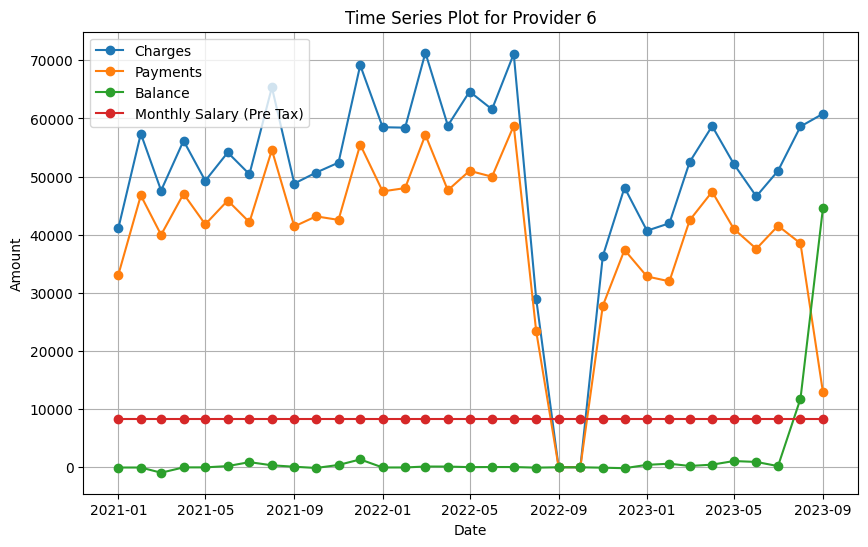

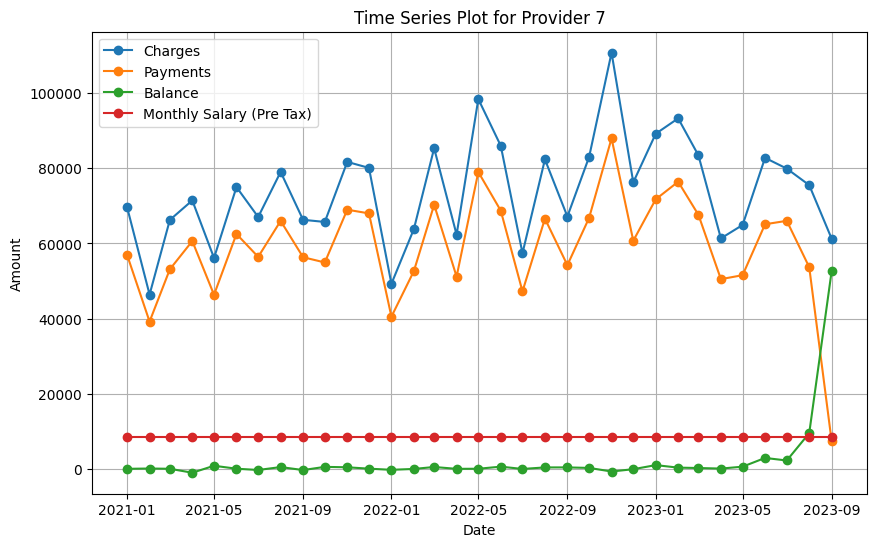

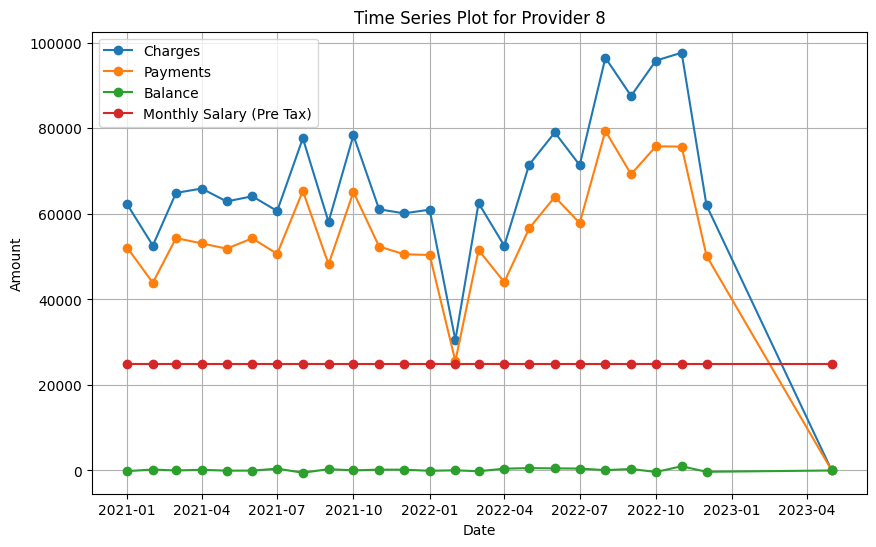

In [40]:
# Group the data by 'Provider' and 'Date' and sum the charges, payments, and balances
provider_time_series = data.groupby(['Provider', 'Date'])[['Charges', 'Payments', 'Balance', 'Monthly Salary (Pre Tax)']].sum().reset_index()

# Create time series plots for Charges, Payments, and Balance by Provider
providers = provider_time_series['Provider'].unique()
for provider in providers:
    provider_data = provider_time_series[provider_time_series['Provider'] == provider]

    plt.figure(figsize=(10, 6))
    plt.plot(provider_data['Date'], provider_data['Charges'], label='Charges', marker='o')
    plt.plot(provider_data['Date'], provider_data['Payments'], label='Payments', marker='o')
    plt.plot(provider_data['Date'], provider_data['Balance'], label='Balance', marker='o')
    plt.plot(provider_data['Date'], provider_data['Monthly Salary (Pre Tax)'], label='Monthly Salary (Pre Tax)', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(f'Time Series Plot for {provider}')
    plt.grid(True)
    plt.legend()
    plt.show()


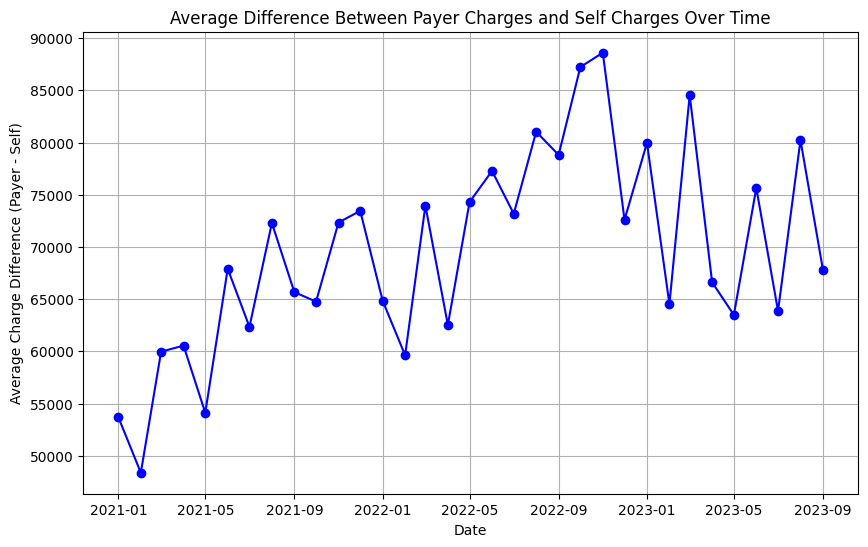

In [41]:
# Calculate the difference between 'Payer Charges' and 'Self Charges'
data['Charge_Difference'] = data['Payer Charges'] - data['Self Charges']

# Group the data by 'Date' and calculate the average difference
average_difference = data.groupby('Date')['Charge_Difference'].mean()

# Create a time series plot for the average difference
plt.figure(figsize=(10, 6))
plt.plot(average_difference.index, average_difference.values, marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Charge Difference (Payer - Self)')
plt.title('Average Difference Between Payer Charges and Self Charges Over Time')
plt.grid(True)
plt.show()

In [42]:
# Calculate the difference between 'Charges' and 'Patient Count'
data['ChargePatient_Difference'] = data['Charges'] / data['Patient Count']

In [43]:
print(data)

              Provider      Month  Year   Charges  Payer Charges  \
Date                                                               
2021-01-01  Provider 1    January  2021  63503.84       63037.84   
2021-02-01  Provider 1   February  2021  39850.40       39850.40   
2021-03-01  Provider 1      March  2021  74180.11       73626.11   
2021-04-01  Provider 1      April  2021  77699.97       76763.50   
2021-05-01  Provider 1        May  2021  76033.75       75630.30   
...                ...        ...   ...       ...            ...   
2023-06-01  Provider 7       June  2023  82788.15       81144.15   
2023-07-01  Provider 7       July  2023  79919.15       79919.15   
2023-08-01  Provider 7     August  2023  75520.10       74771.65   
2023-09-01  Provider 7  September  2023  61241.10       59340.65   
2023-05-01  Provider 8        May  2023     35.00          35.00   

            Self Charges  Payments  Payer Payments  Patient Payments  \
Date                                       

In [44]:
# Calculate the difference between 'Charges' and 'Patient Count'
data['Income to Charges'] = data['Monthly Salary (Pre Tax)'] / data['Charges']

In [45]:
print(data)

              Provider      Month  Year   Charges  Payer Charges  \
Date                                                               
2021-01-01  Provider 1    January  2021  63503.84       63037.84   
2021-02-01  Provider 1   February  2021  39850.40       39850.40   
2021-03-01  Provider 1      March  2021  74180.11       73626.11   
2021-04-01  Provider 1      April  2021  77699.97       76763.50   
2021-05-01  Provider 1        May  2021  76033.75       75630.30   
...                ...        ...   ...       ...            ...   
2023-06-01  Provider 7       June  2023  82788.15       81144.15   
2023-07-01  Provider 7       July  2023  79919.15       79919.15   
2023-08-01  Provider 7     August  2023  75520.10       74771.65   
2023-09-01  Provider 7  September  2023  61241.10       59340.65   
2023-05-01  Provider 8        May  2023     35.00          35.00   

            Self Charges  Payments  Payer Payments  Patient Payments  \
Date                                       

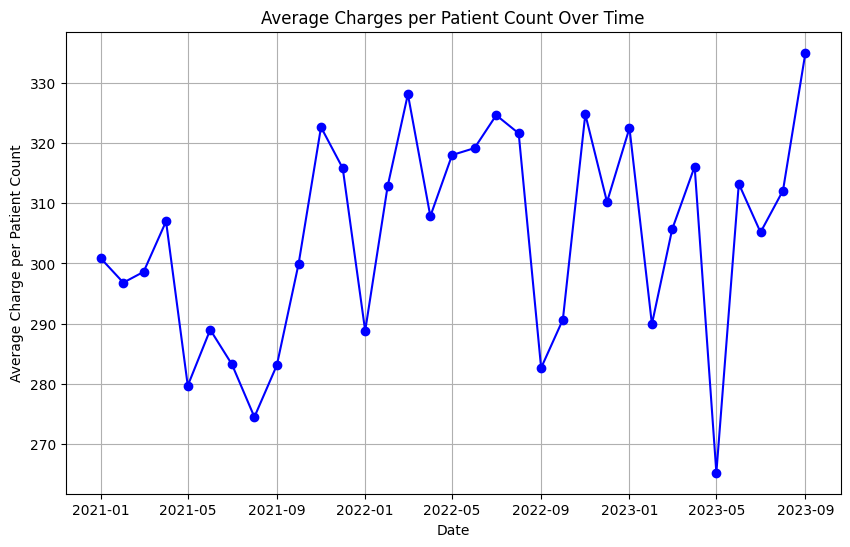

In [46]:
# Group the data by 'Date' and calculate the average difference
average_difference2 = data.groupby('Date')['ChargePatient_Difference'].mean()

# Create a time series plot for the average difference
plt.figure(figsize=(10, 6))
plt.plot(average_difference2.index, average_difference2.values, marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Charge per Patient Count')
plt.title('Average Charges per Patient Count Over Time')
plt.grid(True)
plt.show()

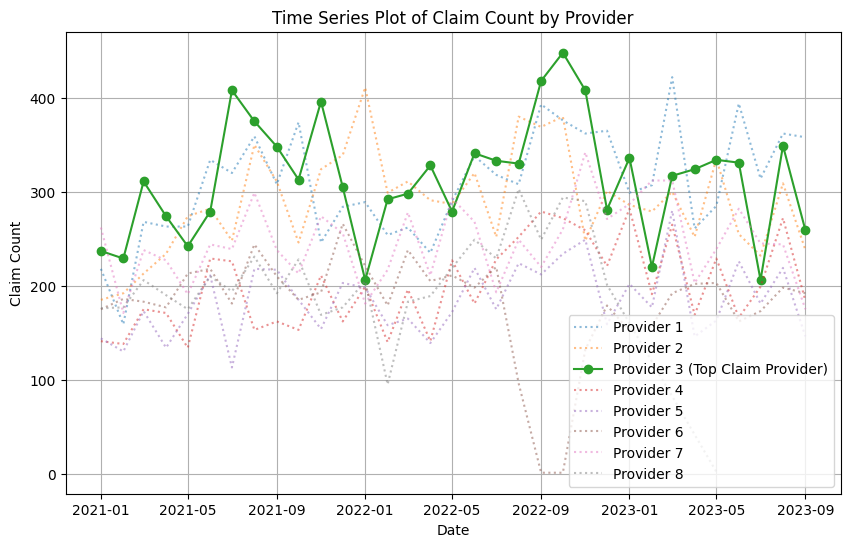

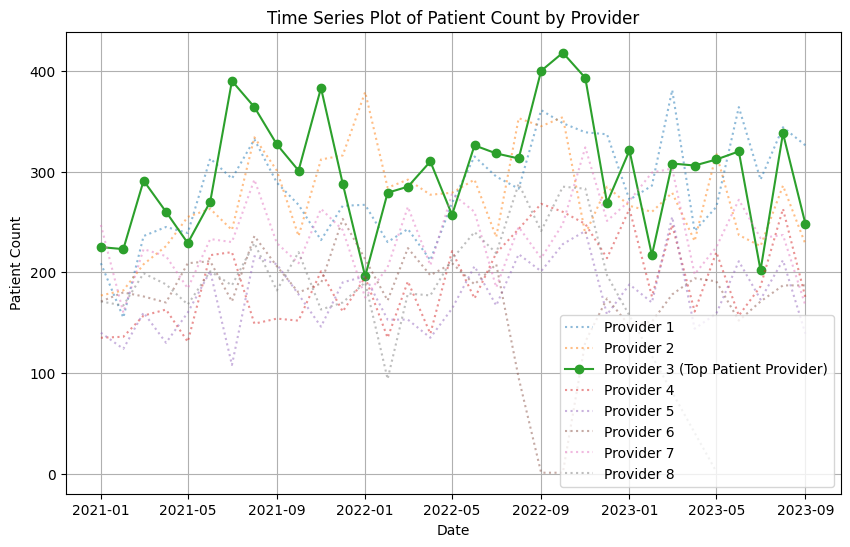

In [47]:
# Group the data by 'Provider' and 'Date' and sum the 'Claim Count' and 'Patient Count'
provider_claim_counts = data.groupby(['Provider', 'Date'])['Claim Count'].sum().reset_index()
provider_patient_counts = data.groupby(['Provider', 'Date'])['Patient Count'].sum().reset_index()

# Find the provider with the most claims and patients
top_claim_provider = provider_claim_counts.groupby('Provider')['Claim Count'].sum().idxmax()
top_patient_provider = provider_patient_counts.groupby('Provider')['Patient Count'].sum().idxmax()

# Create a time series plot for Claim Count
plt.figure(figsize=(10, 6))
for provider, group in provider_claim_counts.groupby('Provider'):
    if provider == top_claim_provider:
        plt.plot(group['Date'], group['Claim Count'], label=f'{provider} (Top Claim Provider)', marker='o')
    else:
        plt.plot(group['Date'], group['Claim Count'], label=provider, alpha=0.5, linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Claim Count')
plt.title('Time Series Plot of Claim Count by Provider')
plt.grid(True)
plt.legend()
plt.show()

# Create a time series plot for Patient Count
plt.figure(figsize=(10, 6))
for provider, group in provider_patient_counts.groupby('Provider'):
    if provider == top_patient_provider:
        plt.plot(group['Date'], group['Patient Count'], label=f'{provider} (Top Patient Provider)', marker='o')
    else:
        plt.plot(group['Date'], group['Patient Count'], label=provider, alpha=0.5, linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.title('Time Series Plot of Patient Count by Provider')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# Group the data by 'Provider' and calculate the total patient and claim counts
provider_counts = data.groupby('Provider')[['Patient Count', 'Claim Count']].sum()

# Sort the providers by claim count in descending order
sorted_providers = provider_counts.sort_values(by='Claim Count', ascending=False)

# Print the providers and their patient and claim counts
print("Provider\tPatient Count\tClaim Count")
for provider, counts in sorted_providers.iterrows():
    print(f"{provider}\t{counts['Patient Count']}\t{counts['Claim Count']}")


Provider	Patient Count	Claim Count
Provider 3	9887	10355
Provider 1	9346	10188
Provider 2	8996	9533
Provider 7	7791	8134
Provider 4	6331	6607
Provider 5	5832	6096
Provider 6	5723	5943
Provider 8	4853	5033


In [49]:
# Group the data by 'Provider' and calculate the average metrics
provider_metrics = data.groupby('Provider').agg({
    'Charges': 'mean',
    'Claim Count': 'mean',
    'Payments': 'mean',
    'Collection %': 'mean',
    'Monthly Salary (Pre Tax)': 'mean',
    'Patient Count': 'sum'
     # Total patient count
})

# Calculate average metrics per patient
provider_metrics['Average Charges per Patient'] = provider_metrics['Charges'] / provider_metrics['Patient Count']
provider_metrics['Average Claims per Patient'] = provider_metrics['Claim Count'] / provider_metrics['Patient Count']
provider_metrics['Average Payments per Patient'] = provider_metrics['Payments'] / provider_metrics['Patient Count']
provider_metrics['Average Collection % per Patient'] = provider_metrics['Collection %'] / provider_metrics['Patient Count']
provider_metrics['Monthly Salary (Pre Tax)'] = provider_metrics['Monthly Salary (Pre Tax)'] / provider_metrics['Patient Count']

# Display the results
print(provider_metrics[['Average Charges per Patient', 'Average Claims per Patient', 'Average Payments per Patient', 'Average Collection % per Patient', 'Monthly Salary (Pre Tax)']])


            Average Charges per Patient  Average Claims per Patient  \
Provider                                                              
Provider 1                     9.715134                    0.033033   
Provider 2                    10.013202                    0.032112   
Provider 3                     7.974641                    0.031737   
Provider 4                     9.212269                    0.031624   
Provider 5                     9.390481                    0.031675   
Provider 6                     8.807870                    0.031468   
Provider 7                     9.484481                    0.031637   
Provider 8                    13.491266                    0.041484   

            Average Payments per Patient  Average Collection % per Patient  \
Provider                                                                     
Provider 1                      7.850932                          0.000104   
Provider 2                      8.270098               

# DATA MODELLING

In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Month', 'Provider'], drop_first=True)

# Define target variables
y_patient_count = data['Patient Count']
y_charges = data['Charges']
y_collection_percentage = data['Collection %']

# Define features (X) by dropping target variables
X = data.drop(['Patient Count', 'Charges', 'Collection %', 'Provider Type'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_patient_count_train, y_patient_count_test, y_charges_train, y_charges_test, y_collection_percentage_train, y_collection_percentage_test = train_test_split(X, y_patient_count, y_charges, y_collection_percentage, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Impute missing values with the most frequent
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and fit multiple regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear'),
}

results = {}  # To store model evaluation results

for model_name, model in models.items():
    model.fit(X_train, y_patient_count_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_patient_count_test, y_pred)
    r2 = r2_score(y_patient_count_test, y_pred)

    results[model_name] = {"MSE": mse, "R-squared": r2}

# Stack rank the models by R-squared
stack_ranked_models = sorted(results.items(), key=lambda x: x[1]["R-squared"], reverse=True)

# Print the stack-ranked models
print("Stack Ranked Models by R-squared (Highest to Lowest):")
for rank, (model_name, metrics) in enumerate(stack_ranked_models, start=1):
    print(f"{rank}. {model_name}: R-squared = {metrics['R-squared']:.3f}, MSE = {metrics['MSE']:.3f}")

Stack Ranked Models by R-squared (Highest to Lowest):
1. Linear Regression: R-squared = 0.976, MSE = 108.125
2. Random Forest Regressor: R-squared = 0.960, MSE = 175.834
3. Support Vector Regressor: R-squared = -1929.188, MSE = 8519208.120


Identified that Linear Regression is most accurate at predicting patient count - now look to see how we can determine what drives the patient count the most and link CPT data to patient counts / claims.

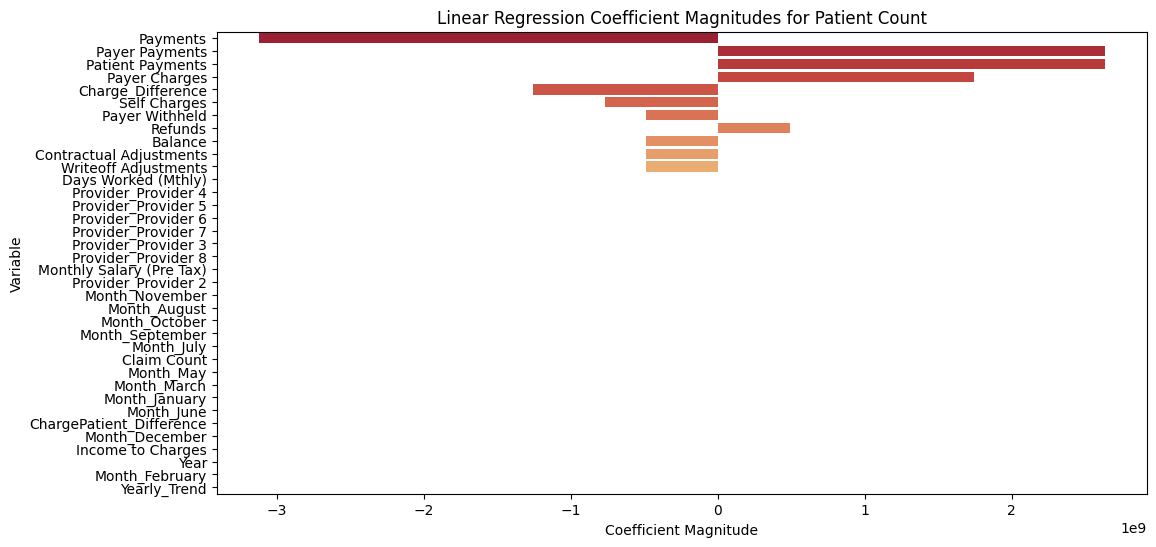

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Linear Regression model
patient_count_model = LinearRegression()
patient_count_model.fit(X_train, y_patient_count_train)

# Get the coefficients from the model
coefficients = patient_count_model.coef_

# Create a DataFrame to store variable names and coefficients
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Create a grid-style plot to visualize coefficient magnitudes
plt.figure(figsize=(12, 6))
sns.set_color_codes("muted")
sns.barplot(x="Coefficient", y="Variable", data=coefficients_df,
            palette=sns.color_palette("RdYlGn", n_colors=len(coefficients_df)))
plt.xlabel('Coefficient Magnitude')
plt.title('Linear Regression Coefficient Magnitudes for Patient Count')
plt.show()


In [52]:
# Get the coefficients of the model
coefficients = patient_count_model.coef_

# Create a DataFrame to store coefficients along with feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the coefficients by magnitude (absolute value) in descending order
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Analyze the top factors that influence patient count and charges
top_factors_patient_count = coefficients_df[coefficients_df['Coefficient'] > 0]
top_factors_charges = coefficients_df[coefficients_df['Coefficient'] > 0]

# Print the top factors for increasing patient count
print("Top Factors for Increasing Patient Count:")
print(top_factors_patient_count)

# Print the top factors for increasing charges
print("\nTop Factors for Increasing Charges:")
print(top_factors_charges)


Top Factors for Increasing Patient Count:
                     Feature   Coefficient  Absolute_Coefficient
4             Payer Payments  2.632387e+09          2.632387e+09
5           Patient Payments  2.632387e+09          2.632387e+09
1              Payer Charges  1.744929e+09          1.744929e+09
9                    Refunds  4.900186e+08          4.900186e+08
30       Provider_Provider 3  9.694772e+00          9.694772e+00
35       Provider_Provider 8  7.770460e+00          7.770460e+00
12  Monthly Salary (Pre Tax)  5.687371e+00          5.687371e+00
29       Provider_Provider 2  5.624094e+00          5.624094e+00
26            Month_November  2.757052e+00          2.757052e+00
18              Month_August  1.875588e+00          1.875588e+00
27             Month_October  1.599841e+00          1.599841e+00
28           Month_September  1.095191e+00          1.095191e+00
22                Month_July  9.267538e-01          9.267538e-01
10               Claim Count  7.327988e-01      

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2021-01-01 to 2023-05-01
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      256 non-null    object 
 1   Charges                   256 non-null    float64
 2   Payer Charges             256 non-null    float64
 3   Self Charges              256 non-null    float64
 4   Payments                  256 non-null    float64
 5   Payer Payments            256 non-null    float64
 6   Patient Payments          256 non-null    float64
 7   Contractual Adjustments   256 non-null    float64
 8   Payer Withheld            256 non-null    int64  
 9   Writeoff Adjustments      256 non-null    float64
 10  Refunds                   256 non-null    float64
 11  Claim Count               256 non-null    int64  
 12  Patient Count             256 non-null    int64  
 13  Balance                   256 non-null    floa

In [54]:
unique_provider_types = data['Provider Type'].unique()
print("Unique Provider Types:")
print(unique_provider_types)

Unique Provider Types:
['Partner' 'MD']


In [55]:
# Calculate the ratio of Charges to Monthly Salary (Pre Tax) for each provider
data['ChargeSalary_Ratio'] = data['Charges'] / data['Monthly Salary (Pre Tax)']

# Identify providers with the highest ratios and highest predicted patient counts
top_providers = data.groupby('Provider Type').agg({
    'ChargeSalary_Ratio': 'max',
    'Patient Count': 'max'
}).sort_values(by=['ChargeSalary_Ratio', 'Patient Count'], ascending=False).head(5)  # Adjust 'head(5)' based on your preference for the number of providers

# Display the top providers
print("Top Providers based on Charge:Salary Ratio and Predicted Patient Count:")
print(top_providers)


Top Providers based on Charge:Salary Ratio and Predicted Patient Count:
               ChargeSalary_Ratio  Patient Count
Provider Type                                   
MD                      13.293894            324
Partner                  5.074112            418


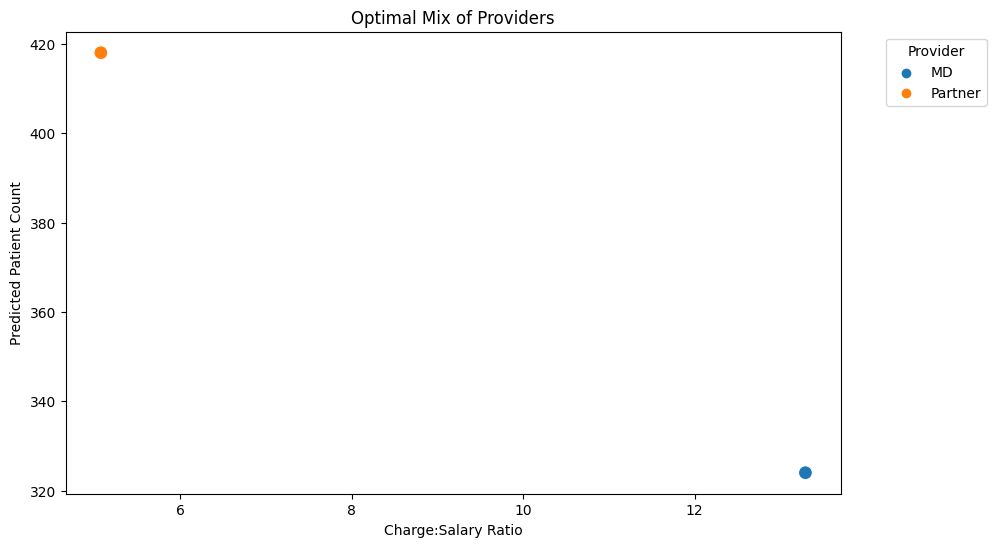

In [56]:
# Visualize the optimal mix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ChargeSalary_Ratio', y='Patient Count', hue='Provider Type', data=top_providers, s=100)
plt.xlabel('Charge:Salary Ratio')
plt.ylabel('Predicted Patient Count')
plt.title('Optimal Mix of Providers')
plt.legend(title='Provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


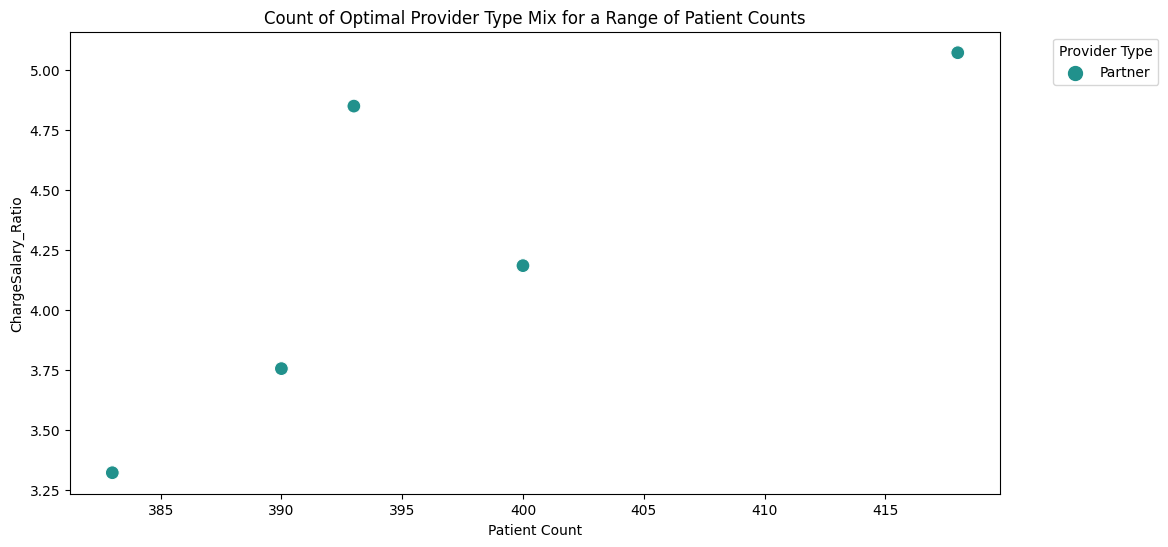

In [57]:
import seaborn as sns

# Optimal mix based on highest patient count and ChargeSalary_Ratio
optimal_mix = data.nlargest(5, ['Patient Count', 'ChargeSalary_Ratio'])

# Visualize the count of optimal provider type mix for a range of patient counts
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Patient Count', y='ChargeSalary_Ratio', hue='Provider Type', size='Provider Type', data=optimal_mix, sizes=(100, 300), palette='viridis', legend='full')
plt.xlabel('Patient Count')
plt.ylabel('ChargeSalary_Ratio')
plt.title('Count of Optimal Provider Type Mix for a Range of Patient Counts')
plt.legend(title='Provider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


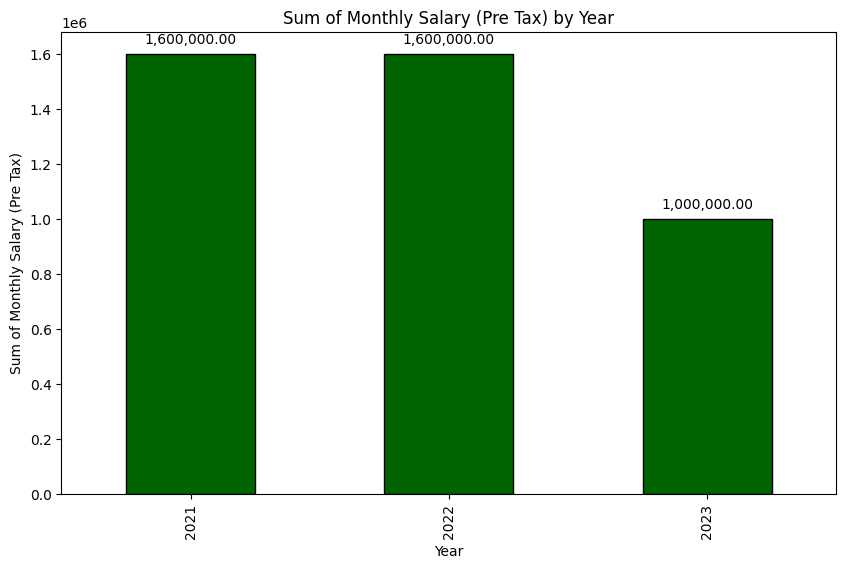

In [58]:
# Group the data by 'Year' and calculate the sum of 'Monthly Salary (Pre Tax)'
sum_salary_by_year = data.groupby('Year')['Monthly Salary (Pre Tax)'].sum()

# Plot the sum of Monthly Salary (Pre Tax) by year with total amounts
plt.figure(figsize=(10, 6))
ax = sum_salary_by_year.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Sum of Monthly Salary (Pre Tax)')
plt.title('Sum of Monthly Salary (Pre Tax) by Year')

# Display total amounts below the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
